# Comparing the different M24 models

In this notebook we compare the different M24 models with nebular emission. The M24 models use the new Geneva tracks that include rotation and have variants for rotating and non-rotating, as well as for corrected effective temperatures for WR winds and uncorrected effective temperatures.

Begin with importing the relevant modules, including `synthesizer`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from synthesizer.grid import Grid
import cmasher as cmr 
from unyt import eV

# and set up plotting 

plt.rcParams['figure.dpi'] = 200
mpl.rcParams.update({'font.size': 12})
cmap = cmr.bubblegum

Load in our grids:

In [8]:
grid_dir = '../grids'

grid_name = 'maraston24_Tenc_kr_0.00_cloudy-c23.01-sps'
grid_tenckr00 = Grid(grid_name, grid_dir=grid_dir, read_lines=True)

grid_name = 'maraston24_Tenc_kr_0.40_cloudy-c23.01-sps'
grid_tenckr04 = Grid(grid_name, grid_dir=grid_dir, read_lines=True)

grid_name = 'maraston24_kr_0.00_cloudy-c23.01-sps'
grid_kr00 = Grid(grid_name, grid_dir=grid_dir, read_lines=True)

grid_name = 'maraston24_kr_0.40_cloudy-c23.01-sps'
grid_kr04 = Grid(grid_name, grid_dir=grid_dir, read_lines=True)

Now plot Figure B1, the specific ionizing photon luminosity of the M24 model as a
function of age for solar metallicity for different rotations and methods of
calculating the temperature: corrected or uncorrected temperatures.

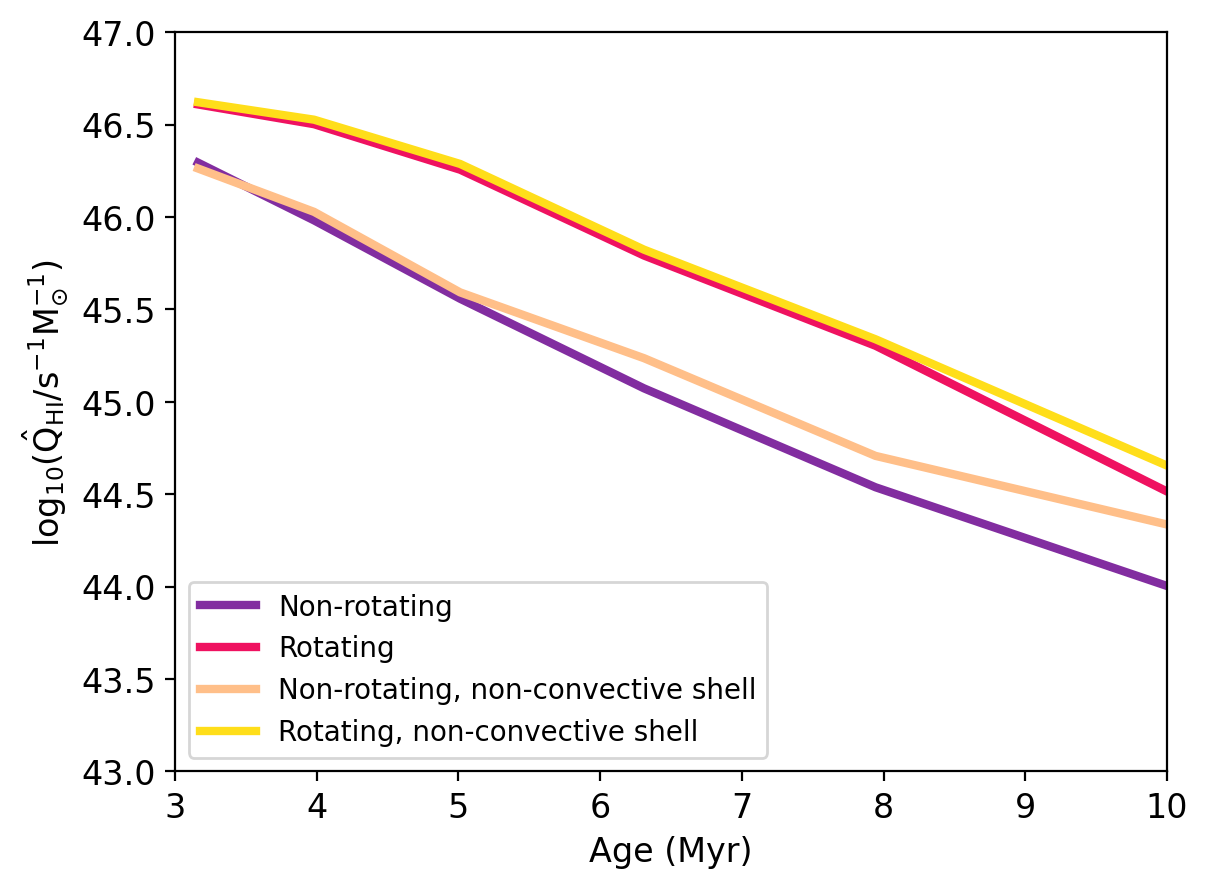

In [14]:
grids = [grid_kr00, grid_kr04, grid_tenckr00, grid_tenckr04]
grid_name = ['Non-rotating', 'Rotating', 'Non-rotating, non-convective shell', 'Rotating, non-convective shell']

colors = ["#822da0", "#ef1260", "#ffbf89", "#ffde1a"]

for ig, grid in enumerate(grids):

    Q = grid.log10_specific_ionising_lum['HI'] # for all Z
    Q_m = Q.T 
    iZ = 0 # solar metallicity
    plt.plot(grid.ages/10**6, Q_m[iZ,:], label=grid_name[ig], color=colors[ig], lw=3)

plt.xlabel(r'Age (Myr)')
plt.ylabel(r'$\rm log_{10}(\hat{Q}_{H I}/s^{-1}M_{\odot}^{-1})$')
plt.ylim(bottom=43, top=47)
plt.xlim(left=3, right=10)
plt.legend(loc='lower left', fontsize=10)

Next we can plot Figure B2, the specific ionizing photon luminosity for [O III] of the M24
models:

Non-rotating 2.025034173728319e+42 1/s
Rotating 1.0759359158037194e+42 1/s
Non-rotating, non-convective shell 4.61674560110756e+44 1/s
Rotating, non-convective shell 2.0025052646674983e+43 1/s


/tmp/ipykernel_5319/2832030785.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(grid.ages/10**6, np.log10(y), c=colors[ig], lw=3, label=grid_name[ig])


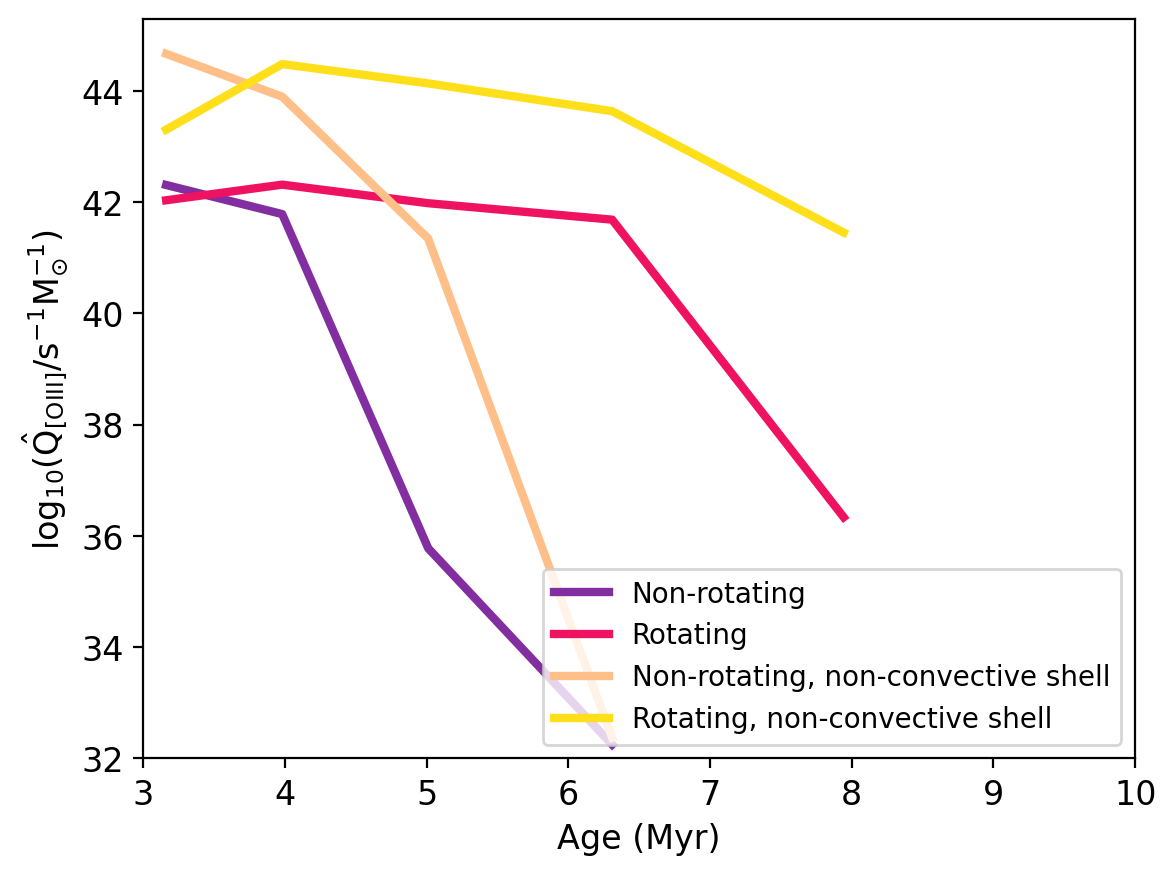

In [16]:
grids = [grid_kr00, grid_kr04, grid_tenckr00, grid_tenckr04]
grid_name = ['Non-rotating', 'Rotating', 'Non-rotating, non-convective shell', 'Rotating, non-convective shell']

colors = ["#822da0", "#ef1260", "#ffbf89", "#ffde1a"]

spectra_id = "incident"

for ig, grid in enumerate(grids):

    y = [] 

    for ia, age in enumerate(grid.ages):

        grid_point = grid.get_grid_point((age,Z))

        sed = grid.get_spectra(grid_point, spectra_id=spectra_id)

        Q = sed.calculate_ionising_photon_production_rate(
            ionisation_energy = 54.9 * eV, limit=1000
        )

        y.append(Q)

    print(grid_name[ig], y[0])

    plt.plot(grid.ages/10**6, np.log10(y), c=colors[ig], lw=3, label=grid_name[ig])

plt.xlabel(r'Age (Myr)')
plt.ylabel(r'$\rm log_{10}(\hat{Q}_{[O III]}/s^{-1}M_{\odot}^{-1})$')
plt.ylim(bottom=32)
plt.xlim(left=3, right=10)
plt.legend(loc='lower right', fontsize=10)

Lastly, let's plot the emission line strengths for H𝛽𝜆4861, [O III]𝜆5007, H𝛼𝜆6563, [N II]𝜆6583, and [S II]𝜆6713 as a function of age.

H$\beta$ 4861 Non-rotating, corrected temperatures 4.988493778043391e+33 erg/s
H$\beta$ 4861 Rotating, corrected temperatures 1.023118905840266e+34 erg/s
H$\beta$ 4861 Non-rotating, uncorrected temperatures 4.666322609307865e+33 erg/s
H$\beta$ 4861 Rotating, uncorrected temperatures 1.0466435702700235e+34 erg/s
[O III] 5007 Non-rotating, corrected temperatures 7.472591857808092e+33 erg/s
[O III] 5007 Rotating, corrected temperatures 3.161481287889455e+34 erg/s
[O III] 5007 Non-rotating, uncorrected temperatures 2.129373792679951e+34 erg/s
[O III] 5007 Rotating, uncorrected temperatures 4.592032153676799e+34 erg/s
H$\alpha$ 6583 Non-rotating, corrected temperatures 1.5233834732390742e+34 erg/s
H$\alpha$ 6583 Rotating, corrected temperatures 3.1159064342943786e+34 erg/s
H$\alpha$ 6583 Non-rotating, uncorrected temperatures 1.4264577284983625e+34 erg/s
H$\alpha$ 6583 Rotating, uncorrected temperatures 3.188639776706004e+34 erg/s
[N II] 6583 Non-rotating, corrected temperatures 5.695724171

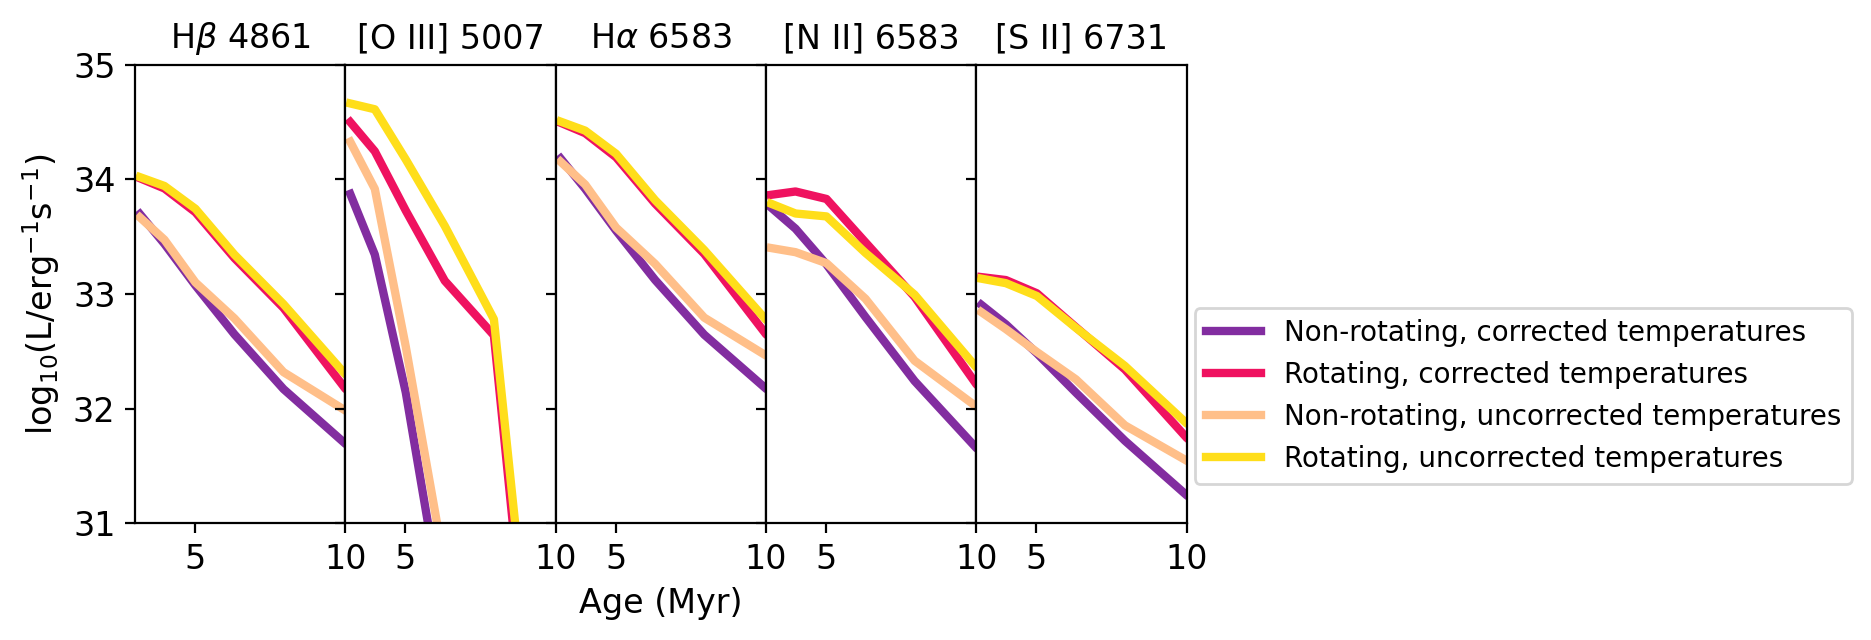

In [13]:
# Recreating Figure 14 of Byler+17 

colors = ["#822da0", "#ef1260", "#ffbf89", "#ffde1a"]

fig, axes = plt.subplots(1, 5, figsize=(10, 3), sharey=True)  # 1 row, 5 columns

line_ids = ['H 1 4861.32A', 'O 3 5006.84A', 'H 1 6562.80A', 'N 2 6583.45A', 'S 2 6730.82A']
line_label = [r'H$\beta$ 4861', '[O III] 5007', r'H$\alpha$ 6583', '[N II] 6583', '[S II] 6731']

grids = [grid_kr00, grid_kr04, grid_tenckr00, grid_tenckr04]
grid_name = ['Non-rotating, corrected temperatures', 'Rotating, corrected temperatures', 'Non-rotating, uncorrected temperatures', 'Rotating, uncorrected temperatures']

Z = 0.02

for line, ax in enumerate(axes):
    ax.set_title(line_label[line], fontsize=12)

    for idx, grid in enumerate(grids) :

            x = []
            y = []
            line_lum = []
            
            for ia, age in enumerate(grid.ages):

                grid_point = grid.get_grid_point((age,Z))

                sed_incident = grid.get_spectra(grid_point, spectra_id="incident")

                #get luminosity of line 
                wanted_line = grid.get_line(grid_point, line_ids[line])
                line_lum.append( wanted_line.luminosity )
            
            ax.plot(grid.ages/1e6, np.log10(line_lum), c=colors[idx], label=grid_name[idx], lw=3, ls='-') 
            ax.set_xlim(left=3, right=10)
            ax.set_ylim(top = 35, bottom=31)

            print(line_label[line], grid_name[idx], line_lum[0])

plt.tight_layout()
axes[0].set_ylabel(r'$\rm log_{10}(L/erg^{-1}s^{-1})$')
axes[2].set_xlabel('Age (Myr)')

axes[4].legend(loc='upper center', bbox_to_anchor=(2.6, 0.5), fontsize=10)

plt.tight_layout(pad=0)  # Set padding between subplots to zero
plt.subplots_adjust(wspace=0)

plt.savefig('/home/sophienewman/Pictures/plots/paper1/new_geneva_tracks.png', dpi=300, bbox_inches='tight')